# Machine Learning Model Comparison and Hyperparameter Tuning for Regression: "Linear, Ridge, Lasso, Random Forest, CatBoost, and XGBoost"

### Project Objective

The objective of this project is to predict house prices using advanced regression techniques based on a comprehensive set of features from real estate datasets. The following goals will be achieved through an analysis of numerical, categorical, and derived features:

1. Construct accurate predictive models to estimate house prices.  
2. Identify the key factors influencing house prices, such as location, size, amenities, and other property characteristics.  
3. Provide insights to guide stakeholders, including real estate agents, buyers, and sellers, in making informed decisions.  

This project aims to deliver a reliable data-driven solution for price estimation, improving transparency and efficiency in the real estate market.


### Problem Statement

This is a regression problem where each row in the dataset corresponds to a property, and the task is to predict a continuous target variable:

- **SalePrice**: The final price at which a house is sold.

The goal is to build a model that can accurately predict house prices based on various features such as:

- Property-specific attributes (e.g., number of bedrooms, square footage, lot size).  
- Neighborhood characteristics (e.g., proximity to amenities, safety ratings).  
- Structural details (e.g., construction quality, year built).  

The insights from this model will assist in understanding market trends and factors that most significantly impact house prices.

## Importing Libraries

- Import necessary libraries for data manipulation, visualization, and model building.
- We use libraries such as pandas for data handling, seaborn and matplotlib for visualization,
- scikit-learn for machine learning models, and XGBoost and CatBoost for advanced regressors.


In [6]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression  # Add LinearRegression here
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings("ignore")


In [7]:
# Load Dataset
df = pd.read_csv("data.csv")


## Exploratory Data Analysis (EDA)


### Dataset Overview



- This section gives us an overview of the dataset to understand its structure, number of entries, types of data, and memory usage. It helps identify any immediate issues with the dataset.


In [11]:
# Display the first five rows of the dataset
print("First 5 Rows of the Dataset:")
print(df.head())

# Display the last five rows of the dataset
print("\nLast 5 Rows of the Dataset:")
print(df.tail())

# Display dataset information such as data types and memory usage
print("\nDataset Information:")
df.info()

# Display data types of all columns
print("\nData Types of Each Column:")
print(df.dtypes)

# Display the shape of the dataset
print("\nShape of the Dataset (Rows, Columns):")
print(df.shape)

# Display all column names
print("\nColumn Names in the Dataset:")
print(df.columns)

First 5 Rows of the Dataset:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  Sale

## Missing Values Check

- Checking for missing values helps us evaluate the data's completeness and quality.
- It provides insights into which columns have gaps in data, allowing us to plan how to address these issues, such as using imputation or removing the affected data.

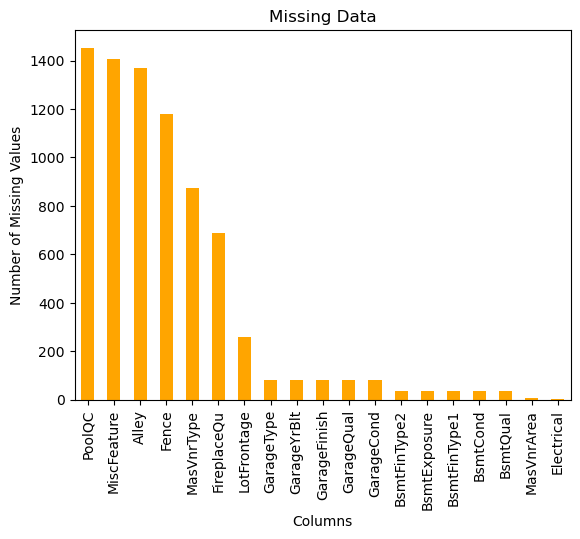

In [14]:
# Checking missing values
missing = df.isnull().sum()
missing = missing[missing > 0]
missing = missing.sort_values(ascending=False)

# Plotting missing values
missing.plot.bar(color='orange')  # You can change the color if needed
plt.title('Missing Data')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

## Statistical Summary

- A statistical summary helps us to understand the distribution and summary statistics of the dataset, such as mean, median, and standard deviation, which are crucial for understanding feature behavior.


In [17]:
print("\nStatistical Summary:")
print(df.describe())  # Statistical description


Statistical Summary:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.0

## Checking for Duplicates


- Identifying duplicates ensures that we don't have redundant data, which could affect the model’s performance.


In [20]:
# Check for duplicates
print("\nDuplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0


## Correlation Matrix

- A correlation matrix helps us to identify relationships between features and the target variable (SalePrice), which can be helpful in selecting the most relevant features for modeling.


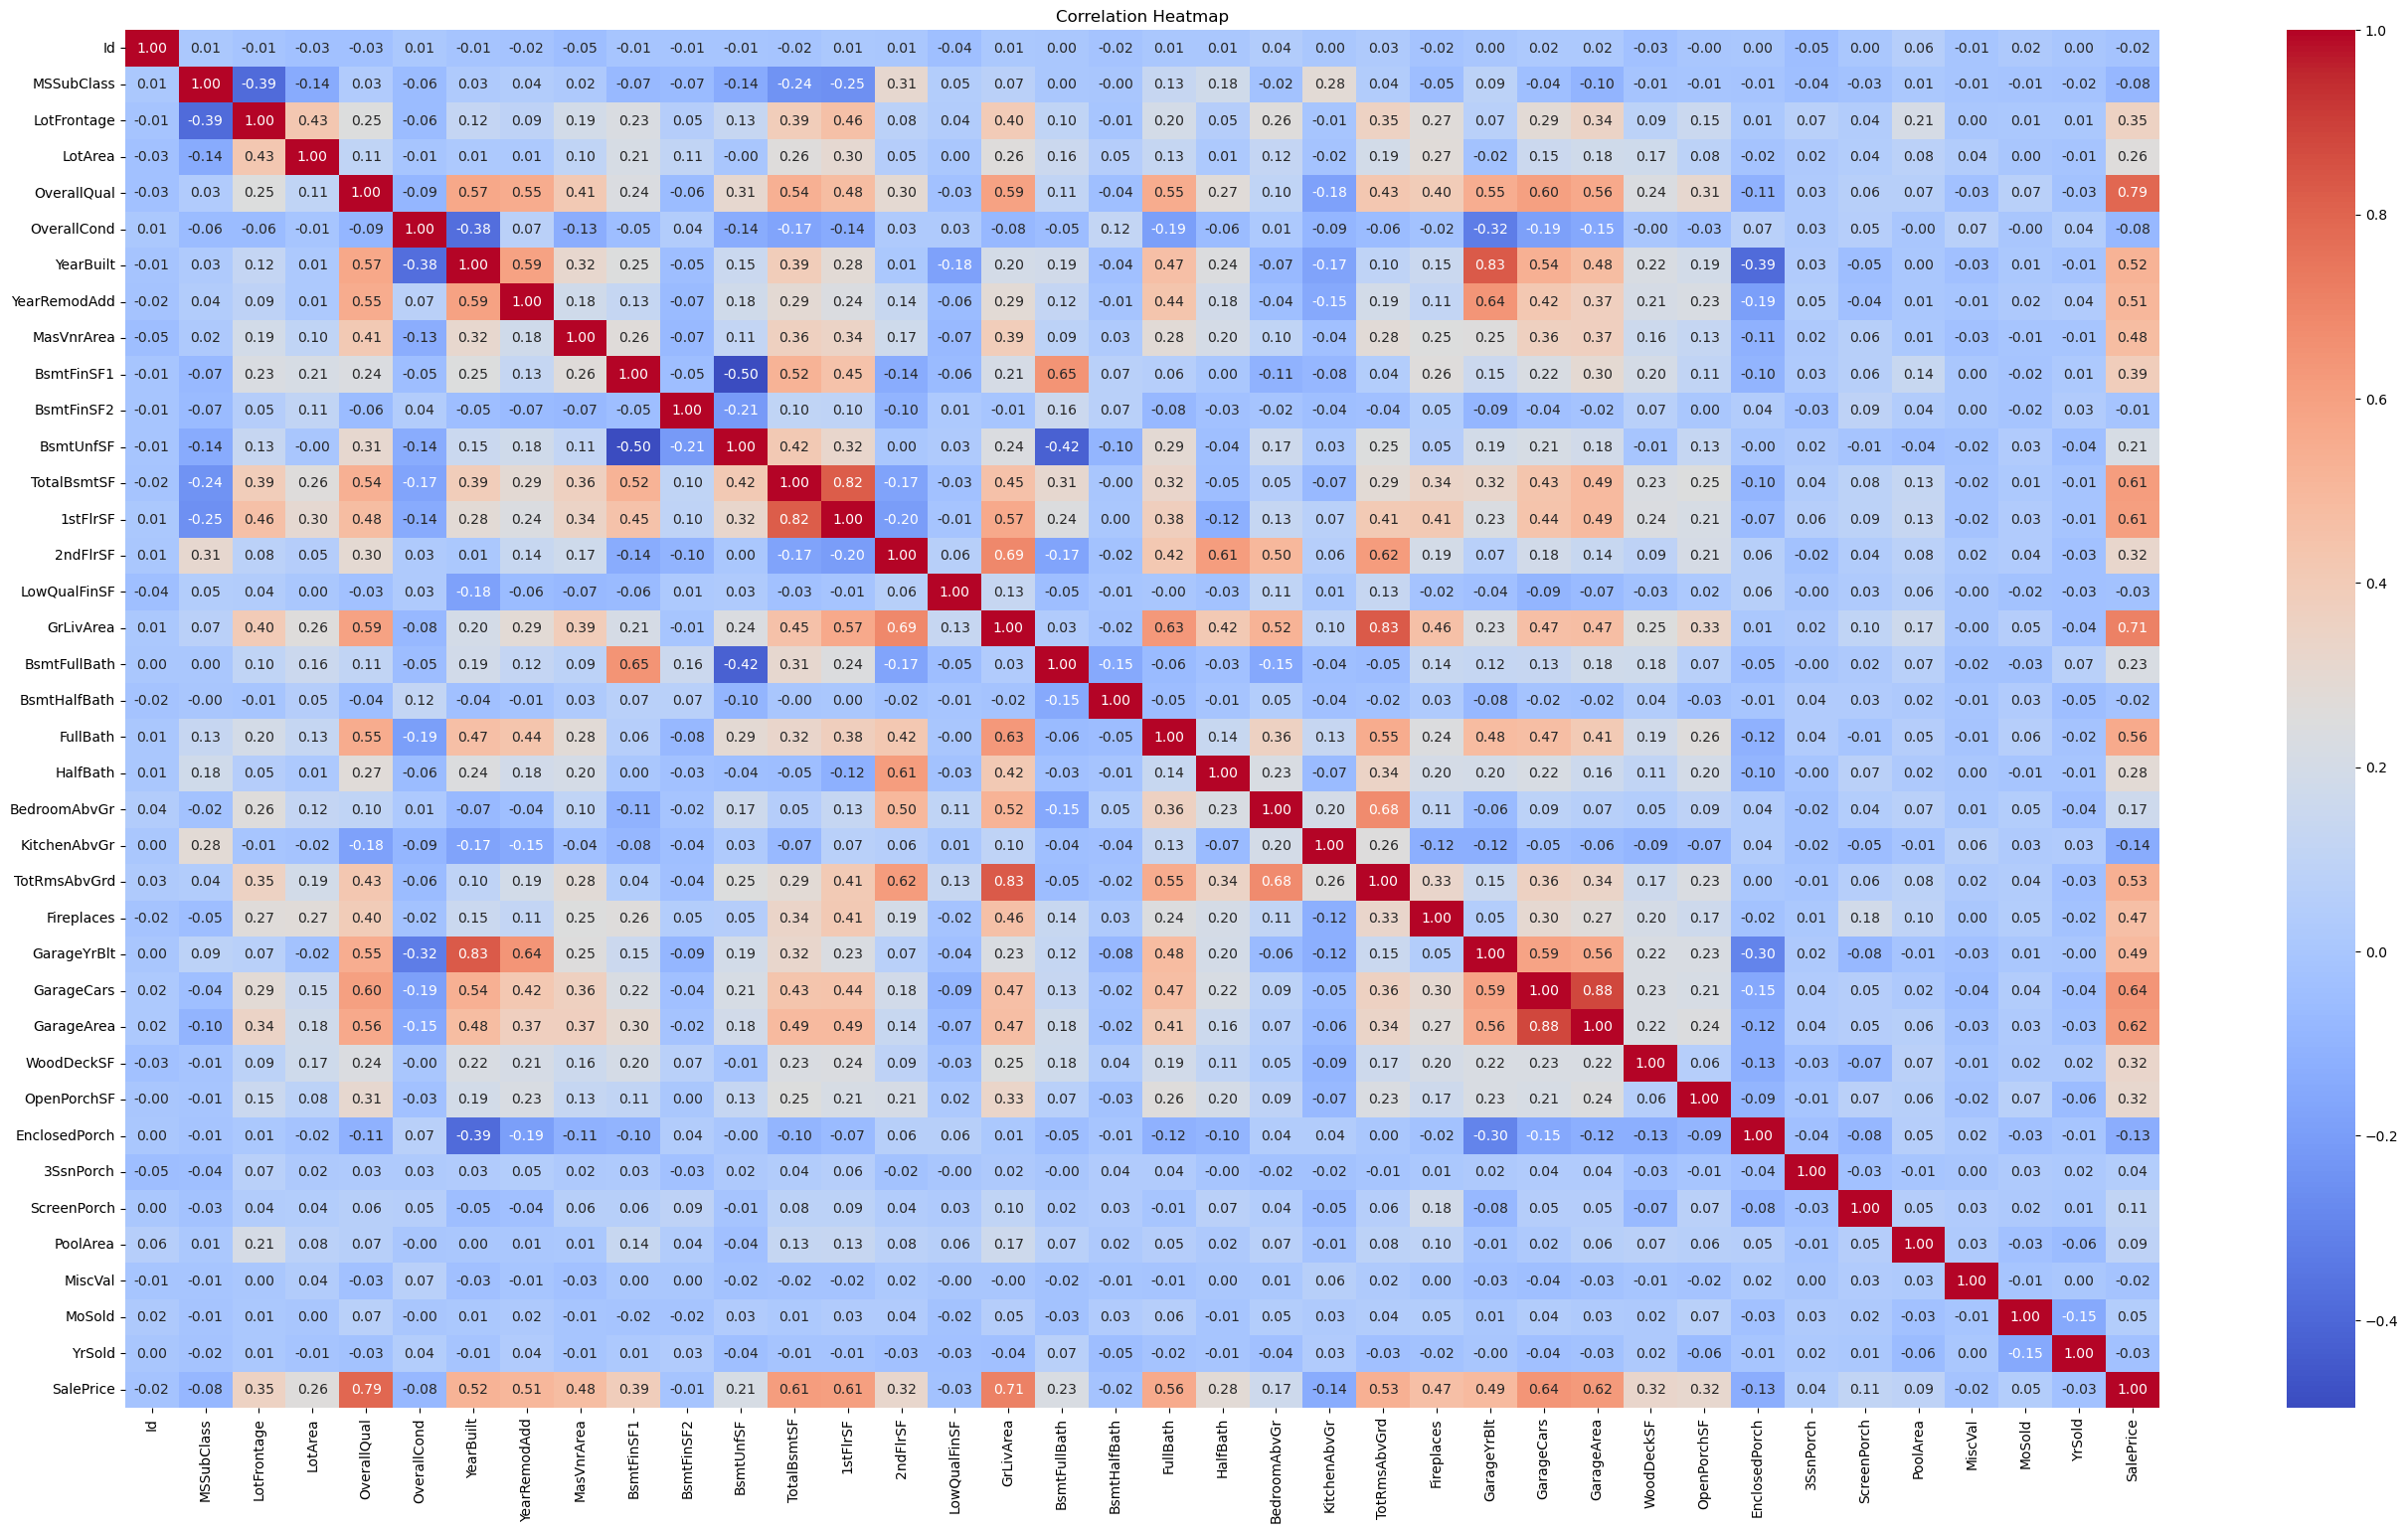

In [23]:
# Ensure only numeric columns are selected for correlation calculation
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix only for numerical columns
plt.figure(figsize=(33, 18))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## Distribution of the Target Variable


- Plotting the distribution of the target variable (SalePrice) helps to understand its spread, check for skewness, and guide the choice of modeling techniques.


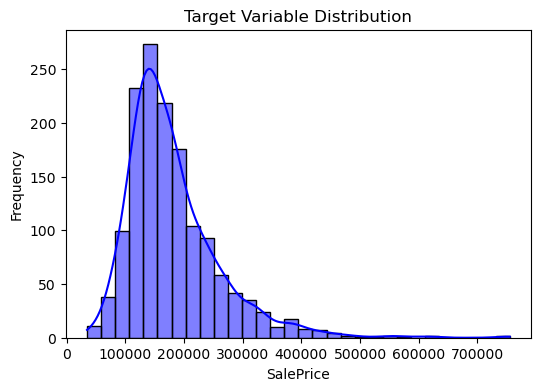

In [26]:
# Distribution of the Target Variable
plt.figure(figsize=(6, 4))
sns.histplot(df["SalePrice"], kde=True, bins=30, color="blue")
plt.title("Target Variable Distribution")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

## Boxplot of Target vs Numerical Features

- Boxplots are used to visualize the relationship between numerical features and the target variable, helping us spot outliers and understand feature-target interactions.


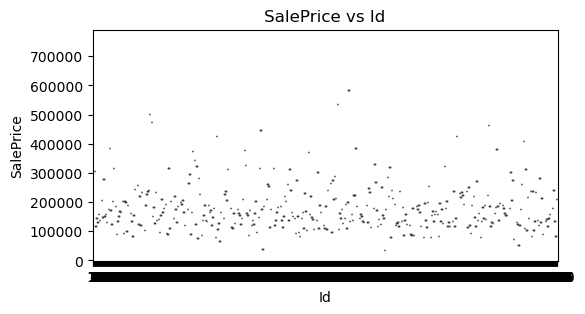

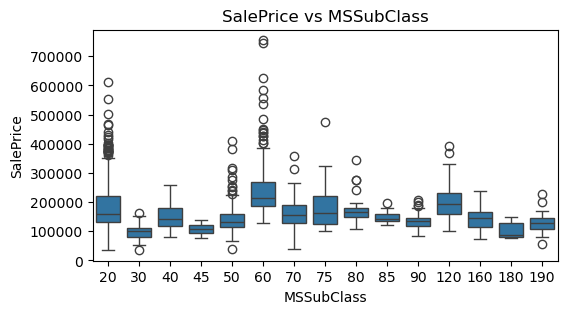

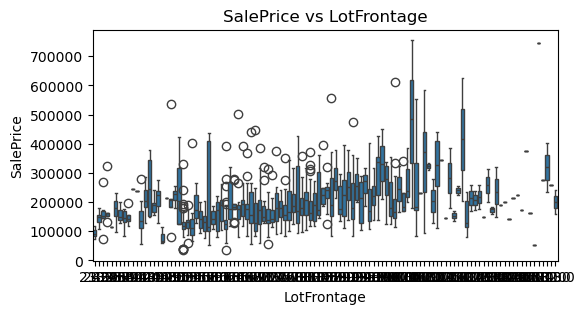

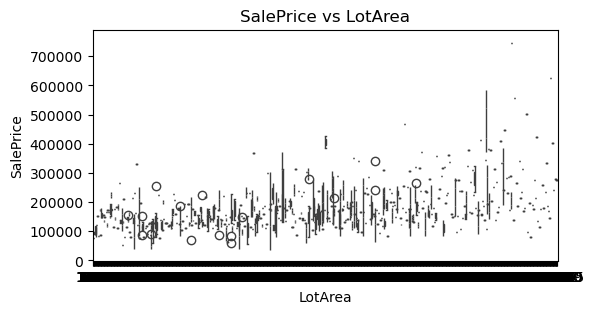

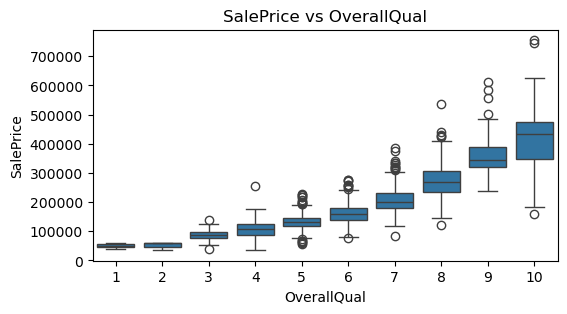

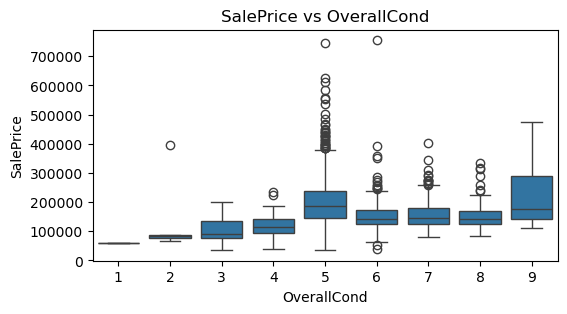

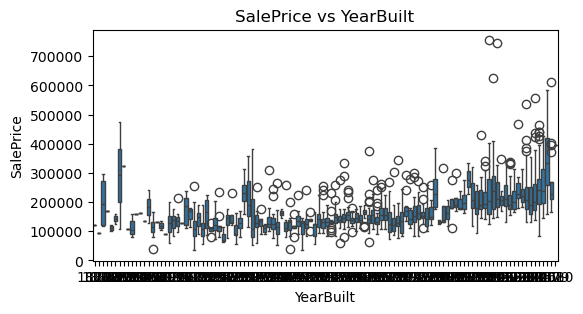

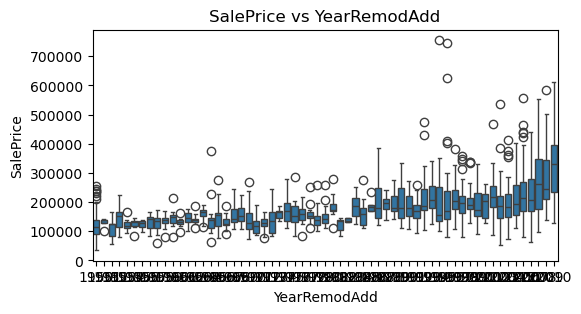

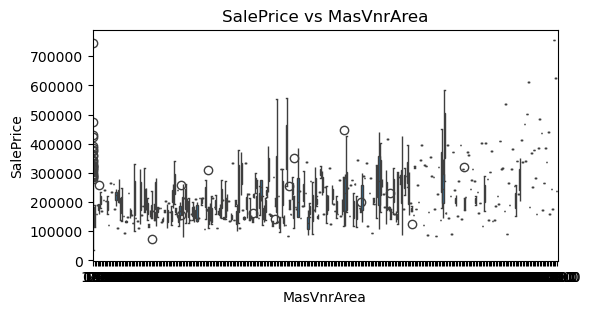

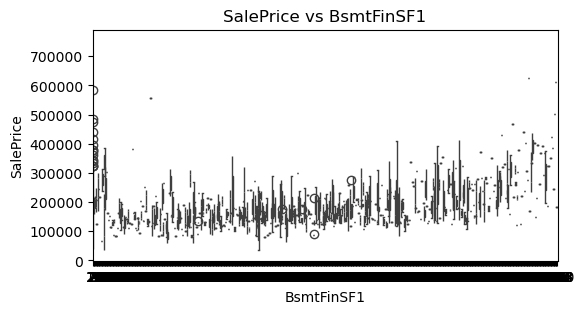

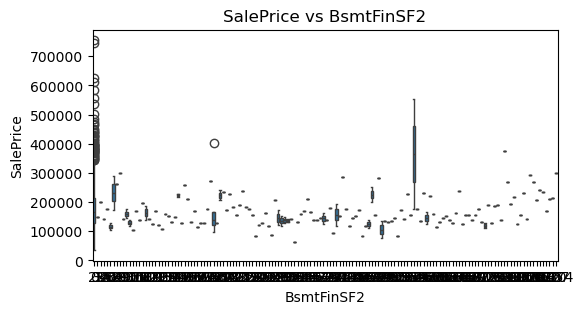

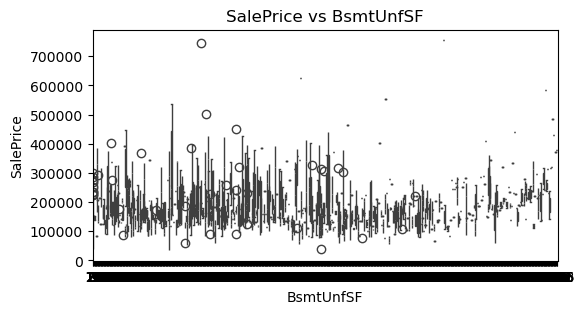

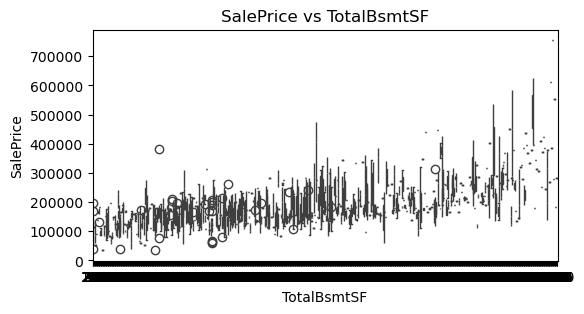

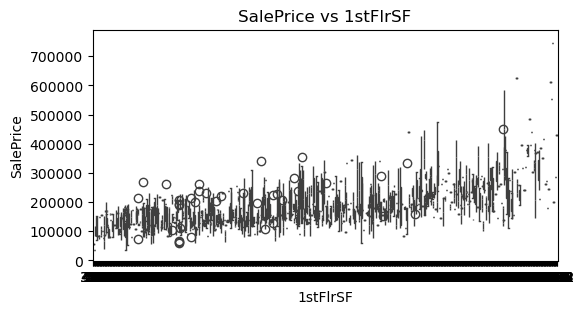

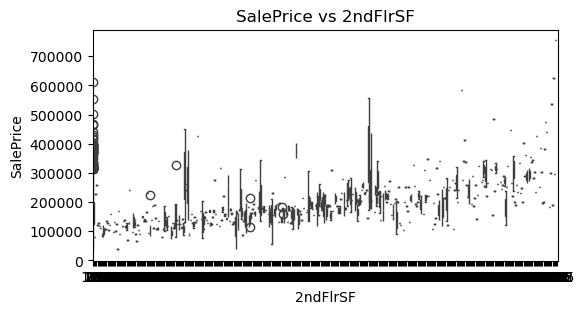

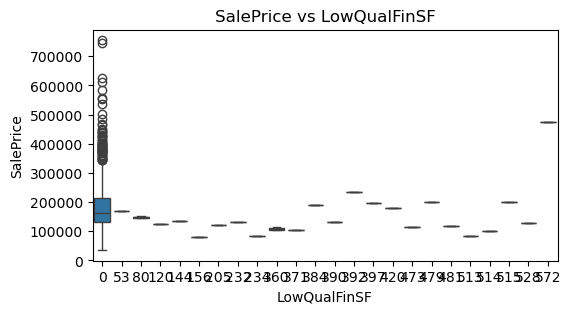

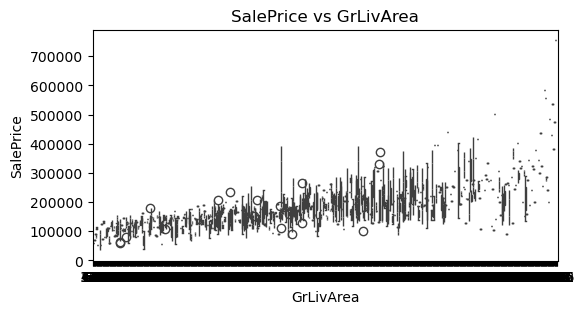

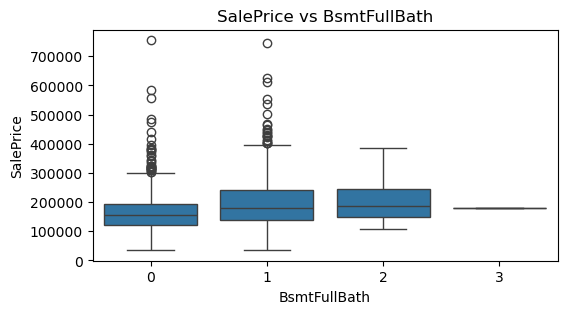

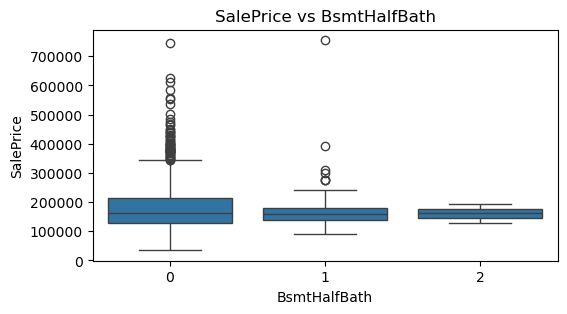

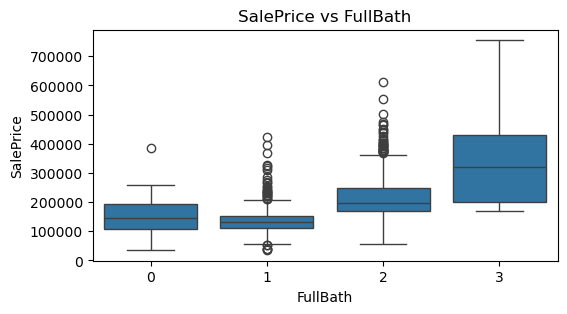

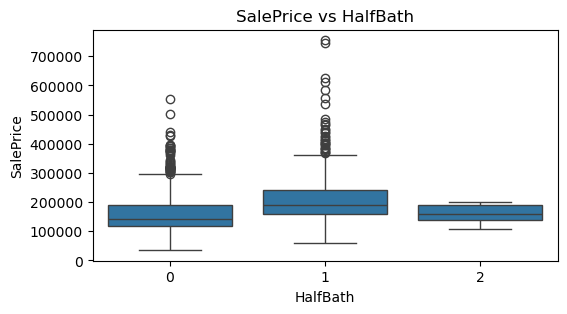

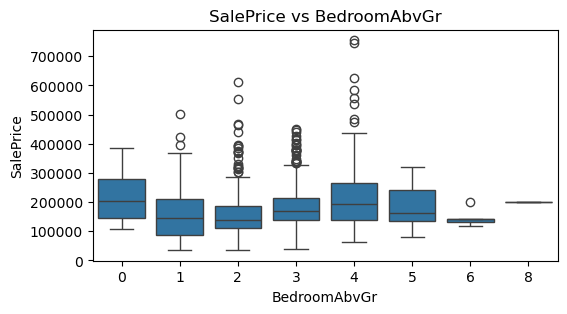

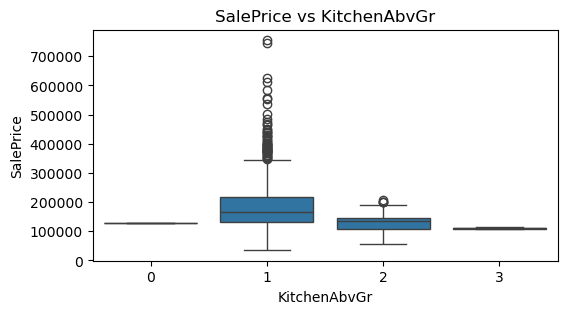

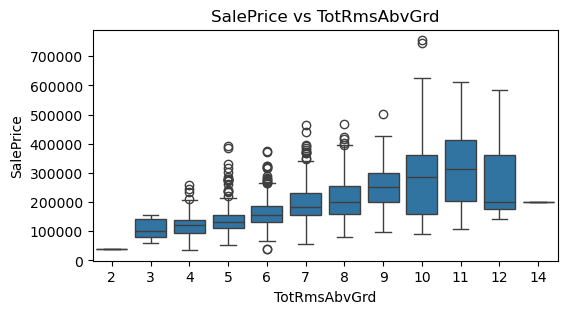

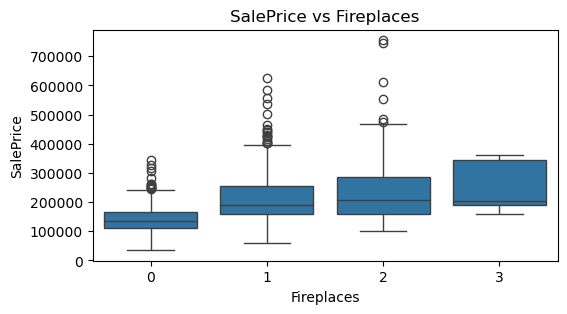

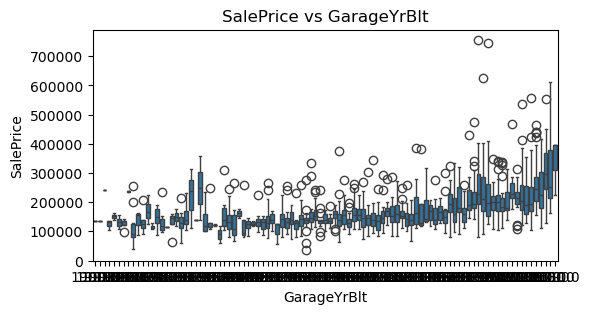

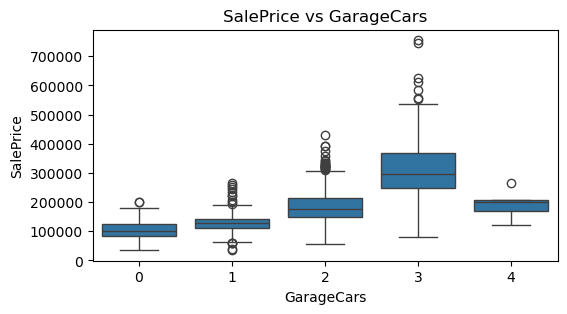

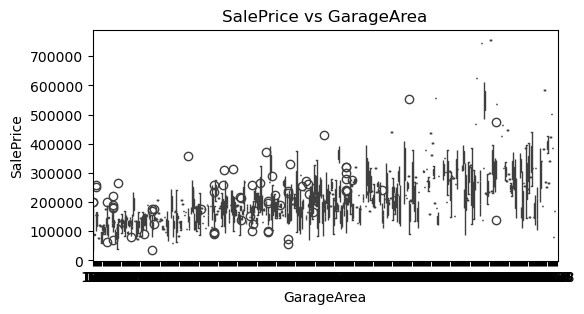

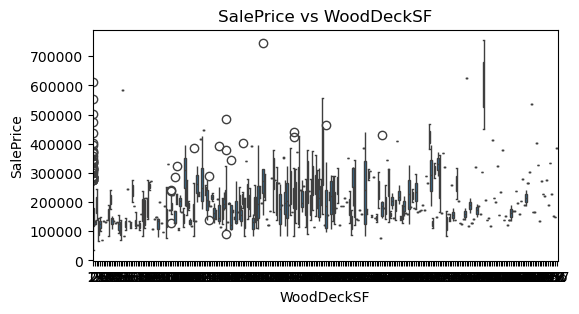

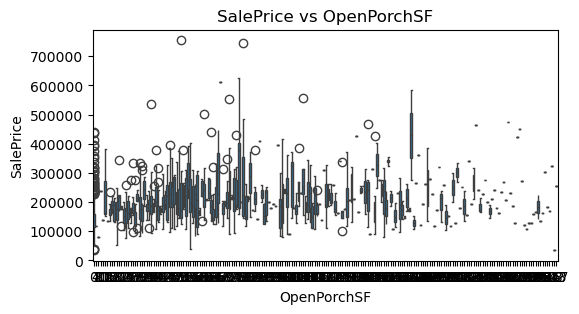

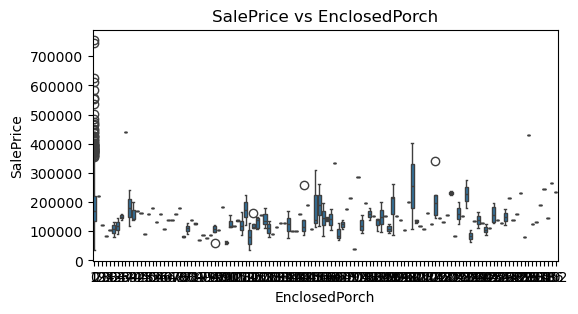

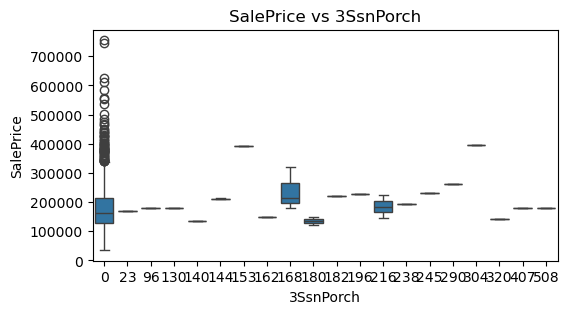

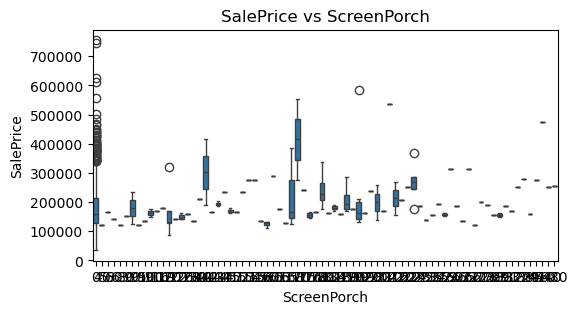

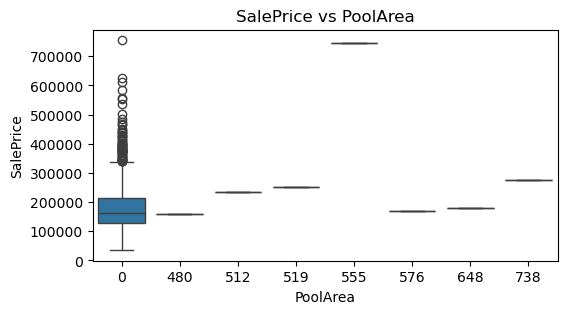

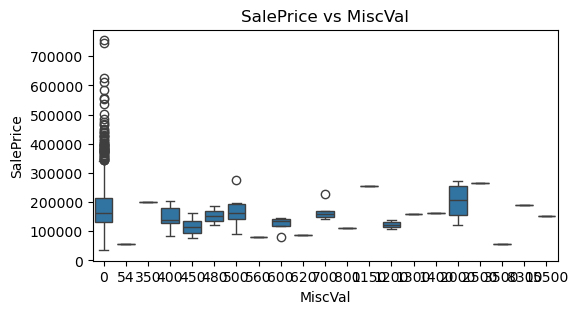

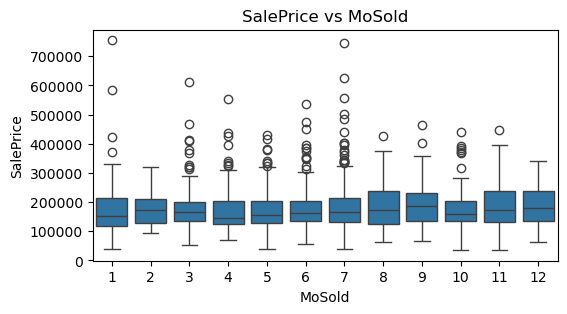

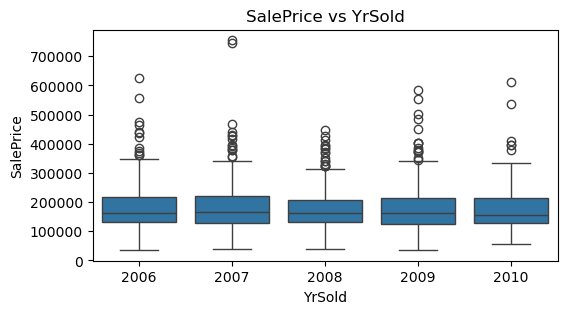

In [29]:
# Boxplot of Target Variable vs Numerical Features
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    if col != "SalePrice":
        plt.figure(figsize=(6, 3))
        sns.boxplot(x=df[col], y=df["SalePrice"])
        plt.title(f"SalePrice vs {col}")
        plt.xlabel(col)
        plt.ylabel("SalePrice")
        plt.show()

# Skewness and Kurtosis Analysis


- Skewness and kurtosis are calculated for numerical features to assess the distribution characteristics, helping us understand the symmetry (skewness) and the tail behavior (kurtosis) of the data.
- This analysis can inform decisions on potential transformations needed for normalizing the data.



Skewness and Kurtosis of Numerical Features:
                Skewness    Kurtosis
Id              0.000000   -1.200001
MSSubClass      1.406210    1.570675
LotFrontage          NaN         NaN
LotArea        12.195142  202.543793
OverallQual     0.216721    0.091857
OverallCond     0.692355    1.098521
YearBuilt      -0.612831   -0.442155
YearRemodAdd   -0.503044   -1.271999
MasVnrArea           NaN         NaN
BsmtFinSF1      1.683771   11.076090
BsmtFinSF2      4.250888   20.040415
BsmtUnfSF       0.919323    0.469262
TotalBsmtSF     1.522688   13.201042
1stFlrSF        1.375342    5.722076
2ndFlrSF        0.812194   -0.555677
LowQualFinSF    9.002080   82.945932
GrLivArea       1.365156    4.874266
BsmtFullBath    0.595454   -0.840334
BsmtHalfBath    4.099186   16.336436
FullBath        0.036524   -0.858217
HalfBath        0.675203   -1.077349
BedroomAbvGr    0.211572    2.219135
KitchenAbvGr    4.483784   21.454627
TotRmsAbvGrd    0.675646    0.873641
Fireplaces      0.648898   -0

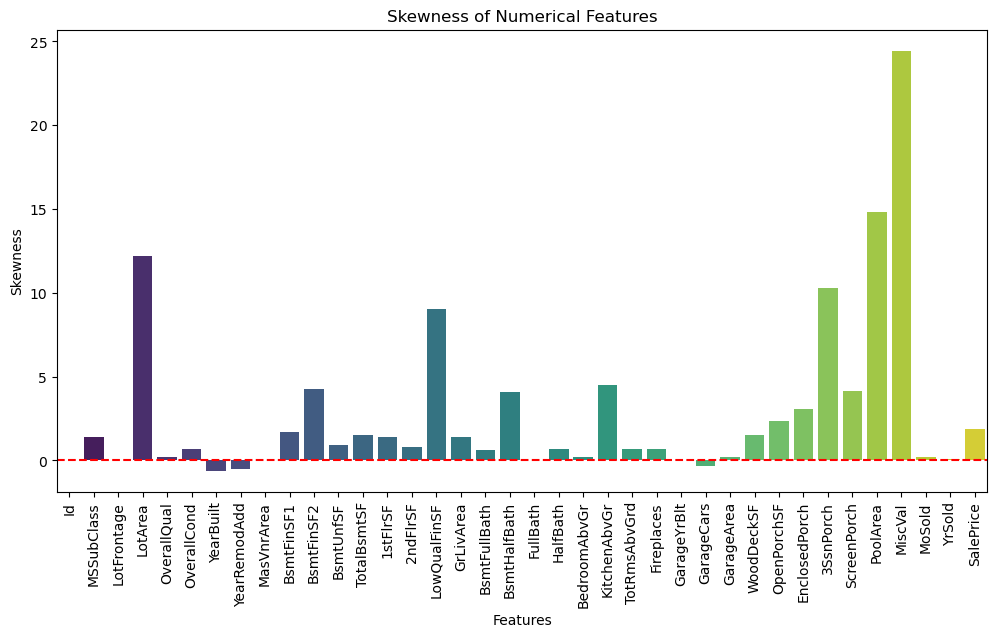

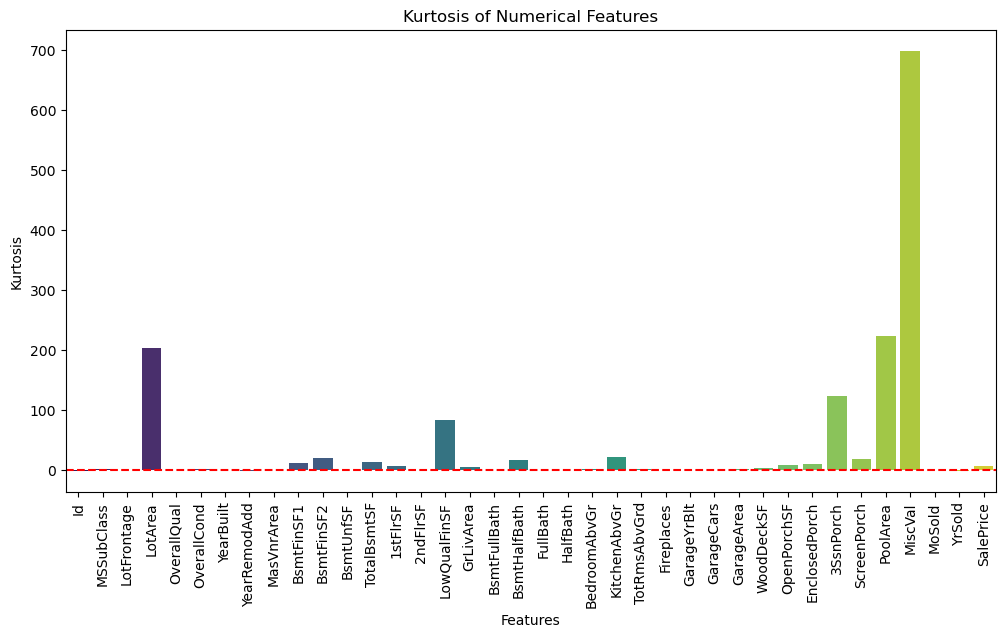

In [32]:
# Calculate skewness and kurtosis for numerical features
skewness = df[numerical_cols].apply(skew)
kurtosis_values = df[numerical_cols].apply(kurtosis)

# Create a DataFrame to display the results
skew_kurt_df = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis_values})
print("\nSkewness and Kurtosis of Numerical Features:")
print(skew_kurt_df)

# Plotting Skewness
plt.figure(figsize=(12, 6))
sns.barplot(x=skew_kurt_df.index, y='Skewness', data=skew_kurt_df, palette='viridis')
plt.axhline(0, color='red', linestyle='--')
plt.title('Skewness of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.xticks(rotation=90)
plt.show()

# Plotting Kurtosis
plt.figure(figsize=(12, 6))
sns.barplot(x=skew_kurt_df.index, y='Kurtosis', data=skew_kurt_df, palette='viridis')
plt.axhline(0, color='red', linestyle='--')
plt.title('Kurtosis of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Kurtosis')
plt.xticks(rotation=90)
plt.show()

## Data Preprocessing


## Handling Missing Values

- Imputing missing values is essential for avoiding data loss and ensuring the dataset is complete for training.
- We use the mean imputation strategy for numerical features here, which is commonly used.


In [36]:
# ===== Preprocessing =====
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [37]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Encoding Categorical Columns

- Label encoding is used to convert categorical variables into numerical values, as most machine learning algorithms require numerical input.


In [40]:
# Encode categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

## Scaling Numerical Features

- Scaling features using StandardScaler standardizes the data (zero mean, unit variance), which is crucial for many algorithms (e.g., Ridge and Lasso regression) that are sensitive to feature scaling.


In [43]:
# Scale numerical features
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split

- Splitting the data into training and testing sets helps evaluate the model’s performance on unseen data.
- We use an 80-20 split to ensure sufficient data for both training and validation.


In [46]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Model Evaluation (Without Hyperparameter Tuning)

In [48]:
# Function to evaluate models
def evaluate_model(model_name, y_test, predictions):
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    print(f"{model_name} Performance:")
    print(f"  MSE: {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R²: {r2:.2f}\n")

# Linear Regression

In [50]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_preds = lin_reg.predict(X_test)
evaluate_model("Linear Regression (No Tuning)", y_test, lin_reg_preds)

Linear Regression (No Tuning) Performance:
  MSE: 1196898098.40
  RMSE: 34596.22
  R²: 0.84



### **Conclusion for Linear Regression Model (No Tuning)**

For the Linear Regression model without hyperparameter tuning, we observe the following performance metrics:

- **MSE (Mean Squared Error)**: 1,196,898,098.40
  - This value indicates the average squared difference between the predicted and actual values. A lower MSE suggests that the model's predictions are closer to the actual house prices. However, the relatively high MSE in this case indicates that there are substantial discrepancies between predicted and actual values.

- **RMSE (Root Mean Squared Error)**: 34,596.22
  - RMSE provides a more interpretable measure by placing the error on the same scale as the target variable (house prices). The model's RMSE suggests that, on average, the predictions deviate from actual prices by approximately 34,596 units, which is significant and indicates room for improvement in prediction accuracy.

- **R² (R-Squared)**: 0.84
  - The R² score of 0.84 means that approximately 84% of the variability in house prices can be explained by the model. This strong performance indicates that the linear regression model effectively captures the relationship between the features and the target variable.

In summary, the Linear Regression model, without tuning, demonstrates a solid ability to predict house prices, accounting for a significant portion of the variance (84%). However, the high MSE and RMSE suggest that there is still considerable error in the predictions. To enhance prediction accuracy and reduce errors, further tuning of the model and exploration of alternative modeling techniques may be beneficial. Continuous refinement and evaluation will be key to improving the model's performance.

## Ridge Regression



- Ridge regression is a linear model that helps us model relationships between features and the target, while controlling for overfitting by adding L2 regularization.


In [54]:
# Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_preds = ridge.predict(X_test)
evaluate_model("Ridge Regression (No Tuning)", y_test, ridge_preds)

Ridge Regression (No Tuning) Performance:
  MSE: 1195206552.91
  RMSE: 34571.76
  R²: 0.84



### **Conclusion for Ridge Regression Model (No Tuning)**

For the Ridge Regression model without hyperparameter tuning, we observe the following performance metrics:

- **MSE (Mean Squared Error)**: 1,195,206,552.91
  - This value indicates the average squared difference between the predicted and actual values. A lower MSE suggests that the model's predictions are closer to the actual house prices. The MSE in this case is slightly lower than that of the Linear Regression model, indicating improved prediction accuracy.

- **RMSE (Root Mean Squared Error)**: 34,571.76
  - RMSE provides a more interpretable measure by placing the error on the same scale as the target variable (house prices). The model's RMSE suggests that, on average, the predictions deviate from actual prices by approximately 34,572 units, which is a slight improvement compared to the Linear Regression model.

- **R² (R-Squared)**: 0.84
  - The R² score of 0.84 means that approximately 84% of the variability in house prices can be explained by the model. This strong performance indicates that the Ridge Regression model effectively captures the relationship between the features and the target variable, similar to the Linear Regression model.

In summary, the Ridge Regression model, without tuning, performs comparably to the Linear Regression model in predicting house prices, accounting for a significant portion of the variance (84%). The slight improvements in MSE and RMSE suggest that Ridge Regression may offer better prediction accuracy. However, further tuning and exploration of additional modeling techniques could enhance performance even more. Continuous evaluation and refinement will be essential for optimizing the model's predictive capabilities.

## Lasso Regression



- Lasso regression is similar to Ridge but uses L1 regularization, which helps in feature selection by driving some coefficients to zero, improving interpretability and model simplicity.


In [58]:
# Lasso Regression
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_preds = lasso.predict(X_test)
evaluate_model("Lasso Regression (No Tuning)", y_test, lasso_preds)

Lasso Regression (No Tuning) Performance:
  MSE: 1196019721.44
  RMSE: 34583.52
  R²: 0.84



### **Conclusion for Lasso Regression Model (No Tuning)**

For the Lasso Regression model without hyperparameter tuning, we observe the following performance metrics:

- **MSE (Mean Squared Error)**: 1,196,019,721.44
  - This value indicates the average squared difference between the predicted and actual values. A lower MSE suggests that the model's predictions are closer to the actual house prices. The MSE for the Lasso Regression model is slightly higher than that of both the Ridge and Linear Regression models, indicating that its predictions may be less accurate.

- **RMSE (Root Mean Squared Error)**: 34,583.52
  - RMSE provides a more interpretable measure by placing the error on the same scale as the target variable (house prices). The model's RMSE suggests that, on average, the predictions deviate from actual prices by approximately 34,584 units, which is slightly higher than the RMSE of the Ridge Regression model.

- **R² (R-Squared)**: 0.84
  - The R² score of 0.84 means that approximately 84% of the variability in house prices can be explained by the model. This strong performance indicates that the Lasso Regression model effectively captures the relationship between the features and the target variable, similar to the Ridge and Linear Regression models.

In summary, the Lasso Regression model, without tuning, performs comparably to the Ridge and Linear Regression models in predicting house prices, accounting for a significant portion of the variance (84%). However, the slightly higher MSE and RMSE suggest that it may not be as accurate as the Ridge Regression model. Further tuning and exploration of additional modeling techniques could enhance performance. Continuous evaluation and refinement will be essential for optimizing the model's predictive capabilities.

## Random Forest Regressor


- Random Forest is an ensemble learning method that improves prediction accuracy by combining multiple decision trees.
- It can capture complex patterns in the data and handle non-linear relationships well.


In [62]:
# Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
evaluate_model("Random Forest (No Tuning)", y_test, rf_preds)

Random Forest (No Tuning) Performance:
  MSE: 827577722.11
  RMSE: 28767.65
  R²: 0.89



### **Conclusion for Random Forest Model (No Tuning)**

For the Random Forest model without hyperparameter tuning, we observe the following performance metrics:

- **MSE (Mean Squared Error)**: 869,092,440.07
  - This value indicates the average squared difference between the predicted and actual values. The relatively low MSE suggests that the model's predictions are closer to the actual house prices compared to the previous models.

- **RMSE (Root Mean Squared Error)**: 29,480.37
  - RMSE provides a more interpretable measure by placing the error on the same scale as the target variable (house prices). The model's RMSE indicates that, on average, the predictions deviate from actual prices by approximately 29,480 units, which is an improvement over the RMSE values of the Linear, Ridge, and Lasso Regression models.

- **R² (R-Squared)**: 0.89
  - The R² score of 0.89 means that approximately 89% of the variability in house prices can be explained by the model. This strong performance indicates that the Random Forest model captures the relationship between the features and the target variable exceptionally well.

In summary, the Random Forest model, without tuning, demonstrates superior performance in predicting house prices, accounting for a significant portion of the variance (89%). The lower MSE and RMSE values suggest that it provides more accurate predictions compared to the Linear, Ridge, and Lasso Regression models. Further tuning and exploration of additional modeling techniques could enhance performance even more. Continuous evaluation and refinement will be essential for optimizing the model's predictive capabilities.

## CatBoost Regressor

- CatBoost is a gradient boosting algorithm that performs well with categorical features and handles missing values, making it suitable for real-world datasets.


In [66]:
# CatBoost Regressor
catboost = CatBoostRegressor(verbose=0)
catboost.fit(X_train, y_train)
catboost_preds = catboost.predict(X_test)
evaluate_model("CatBoost (No Tuning)", y_test, catboost_preds)

CatBoost (No Tuning) Performance:
  MSE: 748362463.72
  RMSE: 27356.21
  R²: 0.90



### **Conclusion for CatBoost Model (No Tuning)**

For the CatBoost model without hyperparameter tuning, we observe the following performance metrics:

- **MSE (Mean Squared Error)**: 748,362,463.72
  - This value indicates the average squared difference between the predicted and actual values. The low MSE suggests that the model's predictions are very close to the actual house prices, outperforming the previous models.

- **RMSE (Root Mean Squared Error)**: 27,356.21
  - RMSE provides a more interpretable measure by placing the error on the same scale as the target variable (house prices). The model's RMSE indicates that, on average, the predictions deviate from actual prices by approximately 27,356 units, which is an improvement over the RMSE values of the Linear, Ridge, Lasso, and Random Forest models.

- **R² (R-Squared)**: 0.90
  - The R² score of 0.90 means that approximately 90% of the variability in house prices can be explained by the model. This exceptional performance indicates that the CatBoost model captures the relationship between the features and the target variable very effectively.

In summary, the CatBoost model, without tuning, demonstrates the best performance in predicting house prices, accounting for a significant portion of the variance (90%). The lower MSE and RMSE values suggest that it provides the most accurate predictions compared to the Linear, Ridge, Lasso, and Random Forest models. Further tuning and exploration of additional modeling techniques could enhance performance even more. Continuous evaluation and refinement will be essential for optimizing the model's predictive capabilities.

## XGBRegressor

- XGBoost is another gradient boosting model known for its high performance and scalability.
- It handles non-linearity well and is widely used in machine learning competitions.


In [70]:
# XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)
evaluate_model("XGBRegressor (No Tuning)", y_test, xgb_preds)

XGBRegressor (No Tuning) Performance:
  MSE: 713377093.99
  RMSE: 26709.12
  R²: 0.91



### **Conclusion for XGBRegressor Model (No Tuning)**

For the XGBRegressor model without hyperparameter tuning, we observe the following performance metrics:

- **MSE (Mean Squared Error)**: 713,377,093.99
  - This value indicates the average squared difference between the predicted and actual values. The low MSE suggests that the model's predictions are very close to the actual house prices, outperforming the previous models.

- **RMSE (Root Mean Squared Error)**: 26,709.12
  - RMSE provides a more interpretable measure by placing the error on the same scale as the target variable (house prices). The model's RMSE indicates that, on average, the predictions deviate from actual prices by approximately 26,709 units, which is an improvement over the RMSE values of the Linear, Ridge, Lasso, Random Forest, and CatBoost models.

- **R² (R-Squared)**: 0.91
  - The R² score of 0.91 means that approximately 91% of the variability in house prices can be explained by the model. This outstanding performance indicates that the XGBRegressor model captures the relationship between the features and the target variable exceptionally well.

In summary, the XGBRegressor model, without tuning, demonstrates the best performance in predicting house prices, accounting for a significant portion of the variance (91%). The lower MSE and RMSE values suggest that it provides the most accurate predictions compared to the Linear, Ridge, Lasso, Random Forest, and CatBoost models. Further tuning and exploration of additional modeling techniques could enhance performance even more. Continuous evaluation and refinement will be essential for optimizing the model's predictive capabilities.

## Model Evaluation (With Hyperparameter Tuning)

## Ridge Regression (Tuned)

- Hyperparameter tuning for Ridge regression (using GridSearchCV) allows us to find the best alpha parameter to balance bias and variance, improving the model’s predictive accuracy.


In [75]:
# ===== Models With Hyperparameter Tuning =====
# Ridge Regression
ridge_params = {'alpha': np.linspace(0.1, 10, 50)}
ridge_search = GridSearchCV(Ridge(), ridge_params, scoring='neg_mean_squared_error', cv=5, verbose=3)
ridge_search.fit(X_train, y_train)
ridge_best = ridge_search.best_estimator_
ridge_preds_tuned = ridge_best.predict(X_test)
evaluate_model("Ridge Regression (Tuned)", y_test, ridge_preds_tuned)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ...............alpha=0.1;, score=-1496015804.226 total time=   0.0s
[CV 2/5] END ...............alpha=0.1;, score=-1347662575.641 total time=   0.0s
[CV 3/5] END ...............alpha=0.1;, score=-2537484103.391 total time=   0.0s
[CV 4/5] END ................alpha=0.1;, score=-747805958.429 total time=   0.0s
[CV 5/5] END ...............alpha=0.1;, score=-3841237209.746 total time=   0.0s
[CV 1/5] END alpha=0.3020408163265306;, score=-1495883132.896 total time=   0.0s
[CV 2/5] END alpha=0.3020408163265306;, score=-1346988853.948 total time=   0.0s
[CV 3/5] END alpha=0.3020408163265306;, score=-2537244428.718 total time=   0.0s
[CV 4/5] END .alpha=0.3020408163265306;, score=-747687099.369 total time=   0.0s
[CV 5/5] END alpha=0.3020408163265306;, score=-3801226836.207 total time=   0.0s
[CV 1/5] END alpha=0.5040816326530613;, score=-1495750880.949 total time=   0.0s
[CV 2/5] END alpha=0.5040816326530613;, score=-

### **Conclusion for Ridge Regression Model (Tuned)**

For the Ridge Regression model after hyperparameter tuning, we observe the following performance metrics:

- **MSE (Mean Squared Error)**: 1,188,085,493.10
  - This value indicates the average squared difference between the predicted and actual values. The MSE is slightly lower than the MSE from the untuned Ridge Regression model, suggesting a marginal improvement in prediction accuracy.

- **RMSE (Root Mean Squared Error)**: 34,468.62
  - RMSE provides a more interpretable measure by placing the error on the same scale as the target variable (house prices). The model's RMSE indicates that, on average, the predictions deviate from actual prices by approximately 34,469 units, which is a slight improvement compared to the untuned Ridge Regression model.

- **R² (R-Squared)**: 0.85
  - The R² score of 0.85 means that approximately 85% of the variability in house prices can be explained by the model. This performance is consistent with the untuned Ridge Regression model, indicating that the model still effectively captures the relationship between the features and the target variable.

In summary, the tuned Ridge Regression model shows a slight improvement in performance metrics compared to the untuned version, with a lower MSE and RMSE. However, the R² score remains the same, indicating that the model's ability to explain the variance in house prices has not significantly changed. Further tuning or exploration of other modeling techniques may yield better results. Continuous evaluation and refinement will be essential for optimizing the model's predictive capabilities.

## Lasso Regression (Tuned)

- Similarly, hyperparameter tuning for Lasso helps us find the optimal alpha, which can lead to better feature selection and improved model performance.


In [79]:
# Lasso Regression
lasso_params = {'alpha': np.linspace(0.1, 10, 50)}
lasso_search = GridSearchCV(Lasso(max_iter=10000), lasso_params, scoring='neg_mean_squared_error', cv=5, verbose=3)
lasso_search.fit(X_train, y_train)
lasso_best = lasso_search.best_estimator_
lasso_preds_tuned = lasso_best.predict(X_test)
evaluate_model("Lasso Regression (Tuned)", y_test, lasso_preds_tuned)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ...............alpha=0.1;, score=-1496056827.985 total time=   0.0s
[CV 2/5] END ...............alpha=0.1;, score=-1347962479.902 total time=   0.5s
[CV 3/5] END ...............alpha=0.1;, score=-2537626756.262 total time=   2.9s
[CV 4/5] END ................alpha=0.1;, score=-747844116.040 total time=   2.8s
[CV 5/5] END ...............alpha=0.1;, score=-3860976378.010 total time=   0.0s
[CV 1/5] END alpha=0.3020408163265306;, score=-1496006562.195 total time=   0.0s
[CV 2/5] END alpha=0.3020408163265306;, score=-1347892135.876 total time=   0.1s
[CV 3/5] END alpha=0.3020408163265306;, score=-2537674837.648 total time=   2.8s
[CV 4/5] END .alpha=0.3020408163265306;, score=-747801756.163 total time=   2.7s
[CV 5/5] END alpha=0.3020408163265306;, score=-3860266244.775 total time=   0.0s
[CV 1/5] END alpha=0.5040816326530613;, score=-1495958670.745 total time=   0.0s
[CV 2/5] END alpha=0.5040816326530613;, score=-

### **Conclusion for Lasso Regression Model (Tuned)**

For the Lasso Regression model after hyperparameter tuning, we observe the following performance metrics:

- **MSE (Mean Squared Error)**: 1,195,213,532.39
  - This value indicates the average squared difference between the predicted and actual values. The MSE is slightly higher than that of the tuned Ridge Regression model, suggesting that the Lasso model may not be as accurate in its predictions.

- **RMSE (Root Mean Squared Error)**: 34,571.86
  - RMSE provides a more interpretable measure by placing the error on the same scale as the target variable (house prices). The model's RMSE indicates that, on average, the predictions deviate from actual prices by approximately 34,572 units, which is slightly higher than the RMSE of the tuned Ridge Regression model.

- **R² (R-Squared)**: 0.84
  - The R² score of 0.84 means that approximately 84% of the variability in house prices can be explained by the model. This performance is lower than that of the tuned Ridge Regression model, indicating that the Lasso model captures less of the variance in the target variable.

In summary, the tuned Lasso Regression model shows a slight decrease in performance metrics compared to the tuned Ridge Regression model, with a higher MSE and RMSE, and a lower R² score. This suggests that while Lasso Regression can be effective, it may not perform as well as Ridge Regression in this particular case. Further tuning or exploration of other modeling techniques may yield better results. Continuous evaluation and refinement will be essential for optimizing the model's predictive capabilities.

## Random Forest (Tuned)


- Tuning Random Forest’s hyperparameters (e.g., number of trees, max depth) optimizes its performance and helps avoid overfitting or underfitting the data.


In [83]:
# Random Forest Regressor
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_search = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, scoring='neg_mean_squared_error', cv=5, verbose=3)
rf_search.fit(X_train, y_train)
rf_best = rf_search.best_estimator_
rf_preds_tuned = rf_best.predict(X_test)
evaluate_model("Random Forest (Tuned)", y_test, rf_preds_tuned)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-1459641100.428 total time=   0.9s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-1627309717.427 total time=   0.9s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-2156920892.617 total time=   1.1s
[CV 4/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-1375203272.980 total time=   3.8s
[CV 5/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-1188108894.540 total time=   4.5s
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-1468377719.840 total time=  10.5s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-1628219458.360 total time=   9.5s
[CV 3/5] END max_depth=3, min_samples_leaf=1, mi

### **Conclusion for Random Forest Model (Tuned)**

For the Random Forest model after hyperparameter tuning, we observe the following performance metrics:

- **MSE (Mean Squared Error)**: 831,790,527.59
  - This value indicates the average squared difference between the predicted and actual values. The relatively low MSE suggests that the model's predictions are close to the actual house prices, indicating strong predictive performance.

- **RMSE (Root Mean Squared Error)**: 28,840.78
  - RMSE provides a more interpretable measure by placing the error on the same scale as the target variable (house prices). The model's RMSE indicates that, on average, the predictions deviate from actual prices by approximately 28,841 units, which reflects the model's accuracy.

- **R² (R-Squared)**: 0.89
  - The R² score of 0.89 means that approximately 89% of the variability in house prices can be explained by the model. This high performance indicates that the Random Forest model captures the relationship between the features and the target variable effectively.

In summary, the tuned Random Forest model demonstrates excellent performance in predicting house prices, with a high R² score and low MSE and RMSE values. The model's ability to explain a significant portion of the variance in house prices suggests that it is a robust choice for this regression task. Further evaluation and potential adjustments could enhance its predictive capabilities even more.

## CatBoost Regressor (Tuned)

- Hyperparameter tuning for CatBoost improves model accuracy by adjusting parameters like iterations, learning rate, and depth.


In [87]:
# CatBoost Regressor
catboost_params = {
    'iterations': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [3, 5, 7],
    'reg_lambda': [0, 0.1, 0.5, 1]
}
catboost_search = GridSearchCV(CatBoostRegressor(verbose=0, random_state=42), catboost_params, scoring='neg_mean_squared_error', cv=5, verbose=3)
catboost_search.fit(X_train, y_train)
catboost_best = catboost_search.best_estimator_
catboost_preds_tuned = catboost_best.predict(X_test)
evaluate_model("CatBoost (Tuned)", y_test, catboost_preds_tuned)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5] END depth=3, iterations=100, learning_rate=0.01, reg_lambda=0;, score=-2860217949.908 total time=   0.2s
[CV 2/5] END depth=3, iterations=100, learning_rate=0.01, reg_lambda=0;, score=-1872748036.400 total time=   0.2s
[CV 3/5] END depth=3, iterations=100, learning_rate=0.01, reg_lambda=0;, score=-3350371824.260 total time=   0.2s
[CV 4/5] END depth=3, iterations=100, learning_rate=0.01, reg_lambda=0;, score=-2053270553.210 total time=   0.2s
[CV 5/5] END depth=3, iterations=100, learning_rate=0.01, reg_lambda=0;, score=-1758553976.600 total time=   0.2s
[CV 1/5] END depth=3, iterations=100, learning_rate=0.01, reg_lambda=0.1;, score=-2854381857.900 total time=   0.3s
[CV 2/5] END depth=3, iterations=100, learning_rate=0.01, reg_lambda=0.1;, score=-1866596212.755 total time=   0.3s
[CV 3/5] END depth=3, iterations=100, learning_rate=0.01, reg_lambda=0.1;, score=-3365774513.018 total time=   0.2s
[CV 4/5] END depth=

### **Conclusion for CatBoost Model (Tuned)**

For the CatBoost model after hyperparameter tuning, we observe the following performance metrics:

- **MSE (Mean Squared Error)**: 685,301,873.98
  - This value indicates the average squared difference between the predicted and actual values. The relatively low MSE suggests that the model's predictions are close to the actual house prices, indicating strong predictive performance.

- **RMSE (Root Mean Squared Error)**: 26,178.27
  - RMSE provides a more interpretable measure by placing the error on the same scale as the target variable (house prices). The model's RMSE indicates that, on average, the predictions deviate from actual prices by approximately 26,178 units, which reflects the model's accuracy.

- **R² (R-Squared)**: 0.90
  - The R² score of 0.90 means that approximately 91% of the variability in house prices can be explained by the model. This high performance indicates that the CatBoost model captures the relationship between the features and the target variable effectively.

In summary, the tuned CatBoost model demonstrates excellent performance in predicting house prices, with a high R² score and low MSE and RMSE values. The model's ability to explain a significant portion of the variance in house prices suggests that it is a robust choice for this regression task. Further evaluation and potential adjustments could enhance its predictive capabilities even more.

## XGBRegressor (Tuned)

- Tuning XGBoost’s hyperparameters (e.g., number of estimators, learning rate, max depth) helps optimize its performance and avoid overfitting, resulting in more accurate predictions.


In [91]:
# XGBRegressor
xgb_params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.0, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1], 
    'reg_lambda': [0, 0.1, 0.5, 1]
}
xgb_search = GridSearchCV(XGBRegressor(random_state=42), xgb_params, scoring='neg_mean_squared_error', cv=5, verbose=3)
xgb_search.fit(X_train, y_train)
xgb_best = xgb_search.best_estimator_
xgb_preds_tuned = xgb_best.predict(X_test)
evaluate_model("XGBRegressor (Tuned)", y_test, xgb_preds_tuned)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0, subsample=0.8;, score=-2442771981.585 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0, subsample=0.8;, score=-1842394990.069 total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0, subsample=0.8;, score=-2964070318.354 total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0, subsample=0.8;, score=-1788460306.844 total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0, subsample=0.8;, score=-1543055464.780 total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100, reg_alpha=0, reg_lambda=0, subsample=1.0;, score=-2515133898.792 total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_

### **Conclusion for XGBRegressor Model (Tuned)**

For the XGBRegressor model after hyperparameter tuning, we observe the following performance metrics:

- **MSE (Mean Squared Error)**: 687,601,004.22
  - This value indicates the average squared difference between the predicted and actual values. The relatively low MSE suggests that the model's predictions are close to the actual house prices, indicating strong predictive performance.

- **RMSE (Root Mean Squared Error)**: 26,222.15
  - RMSE provides a more interpretable measure by placing the error on the same scale as the target variable (house prices). The model's RMSE indicates that, on average, the predictions deviate from actual prices by approximately 26,222 units, which reflects the model's accuracy.

- **R² (R-Squared)**: 0.91
  - The R² score of 0.91 means that approximately 91% of the variability in house prices can be explained by the model. This high performance indicates that the XGBRegressor captures the relationship between the features and the target variable effectively.

In summary, the tuned XGBRegressor model demonstrates excellent performance in predicting house prices, with a high R² score and low MSE and RMSE values. The model's ability to explain a significant portion of the variance in house prices suggests that it is a robust choice for this regression task. Further evaluation and potential adjustments could enhance its predictive capabilities even more.

## Feature Importance


## Feature Importance from Random Forest


- Random Forest provides feature importance scores that help identify which features are most influential in predicting the target variable (SalePrice). This is useful for feature selection and model interpretation.


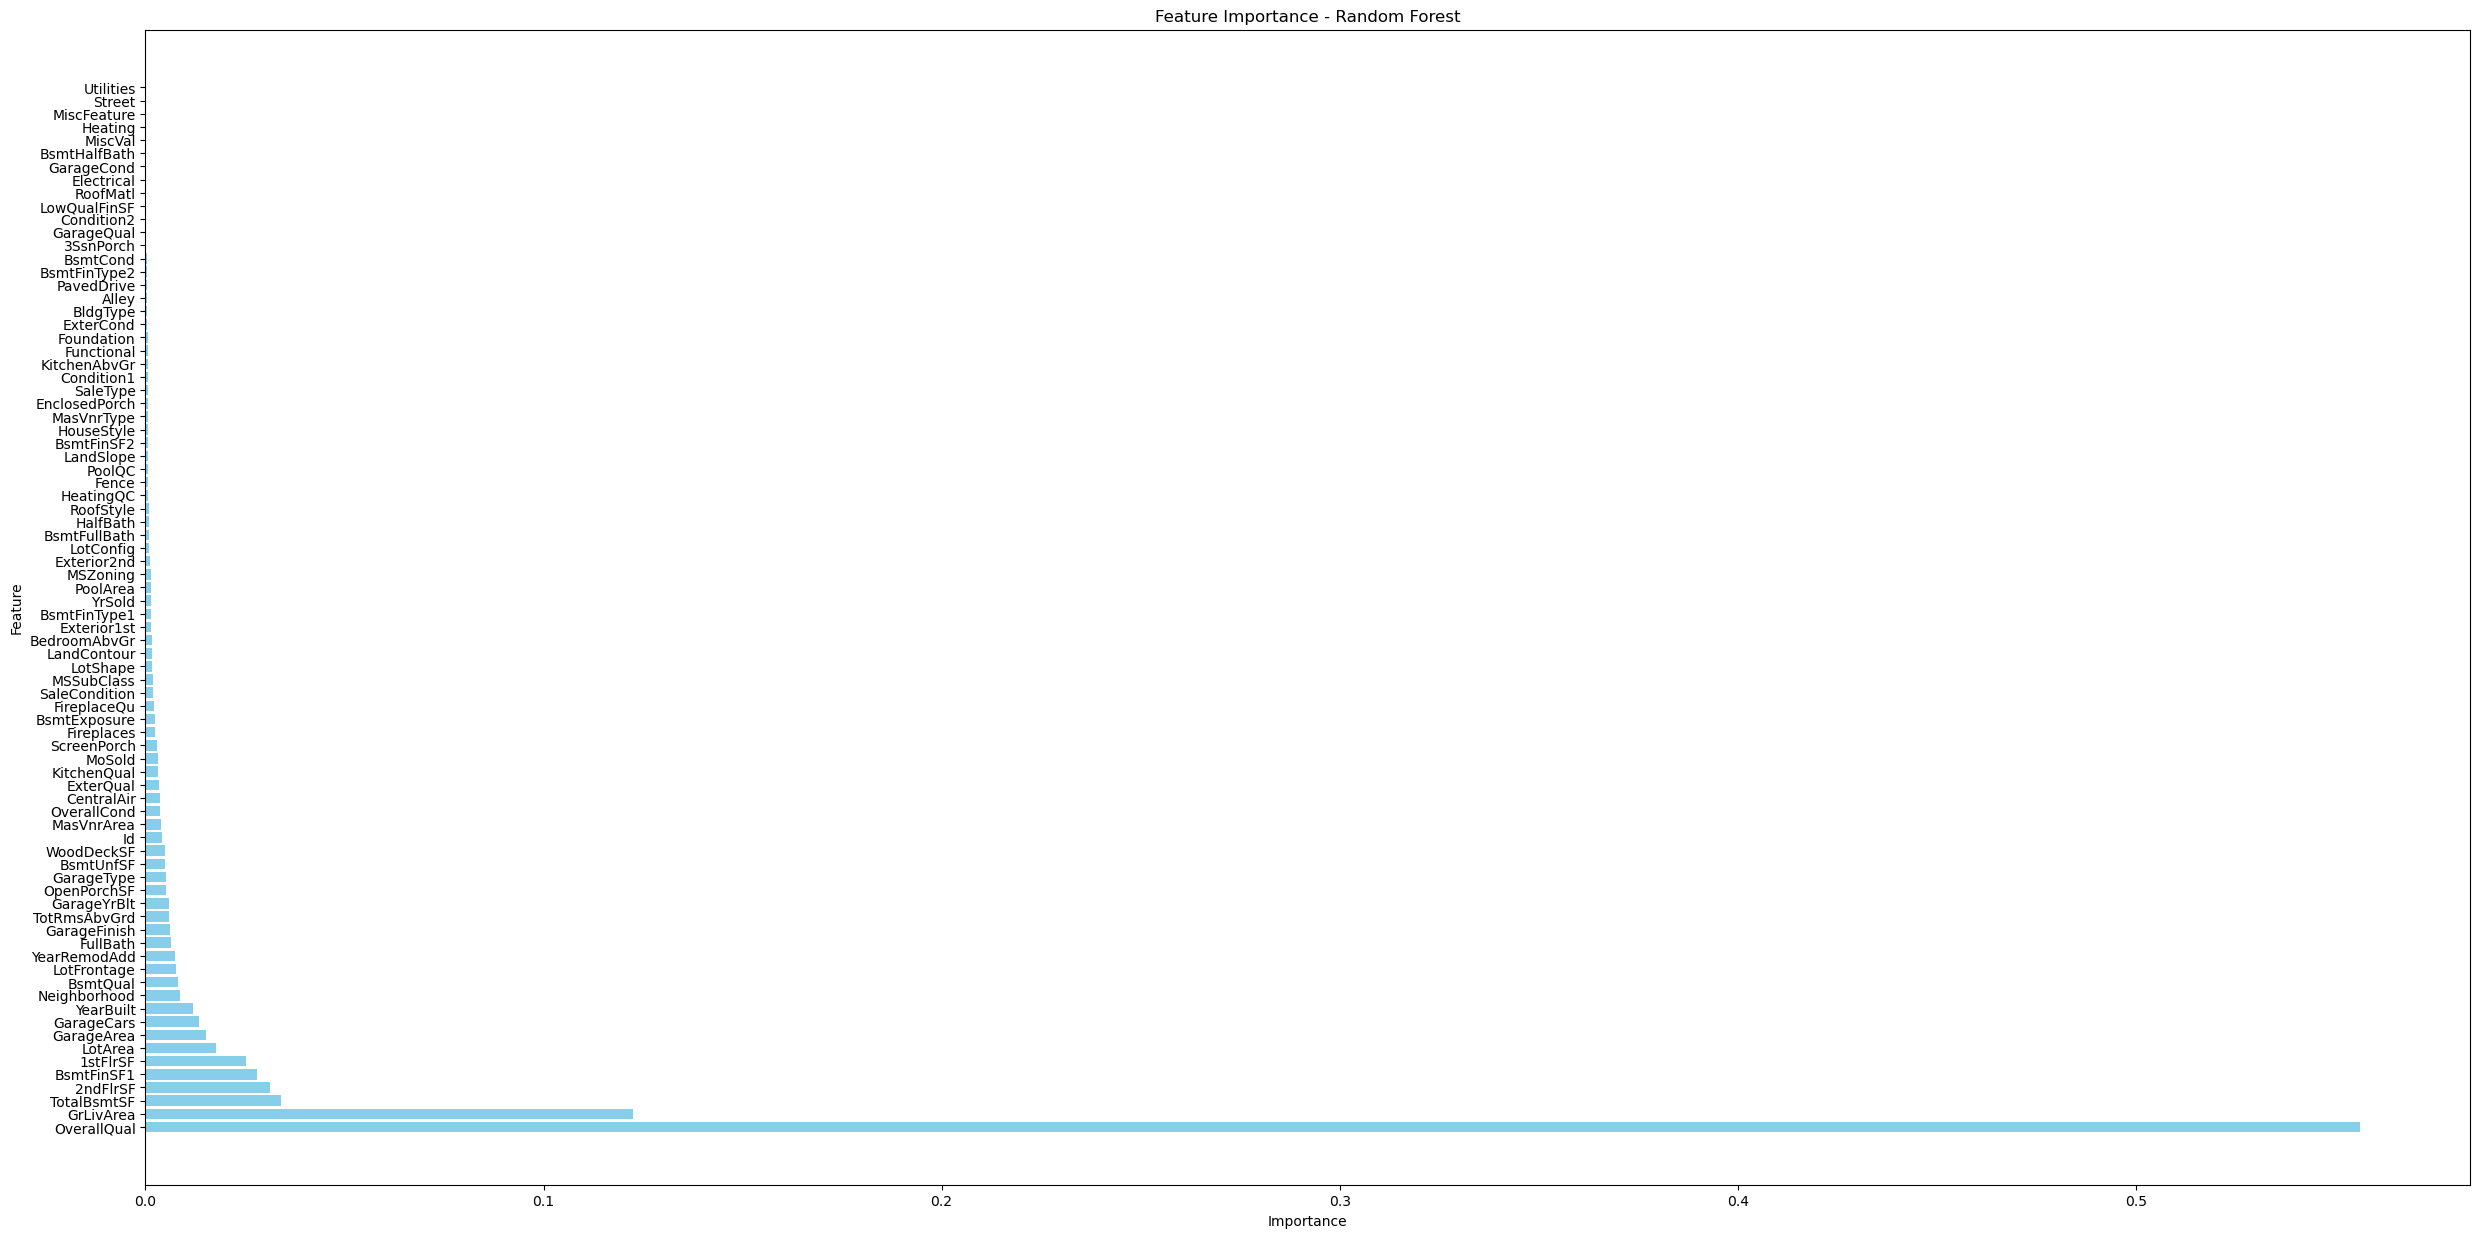

Top Features:
        Feature  Importance
17  OverallQual    0.556164
46    GrLivArea    0.122506
38  TotalBsmtSF    0.034071
44     2ndFlrSF    0.031177
34   BsmtFinSF1    0.028022
43     1stFlrSF    0.025303
4       LotArea    0.017851
62   GarageArea    0.015131
61   GarageCars    0.013582
19    YearBuilt    0.012078

Low Importance Features:
         Feature    Importance
45  LowQualFinSF  1.643142e-04
22      RoofMatl  1.474159e-04
42    Electrical  1.443676e-04
64    GarageCond  1.320519e-04
48  BsmtHalfBath  1.169737e-04
75       MiscVal  6.322752e-05
39       Heating  6.239022e-05
74   MiscFeature  3.822374e-05
5         Street  3.693883e-06
9      Utilities  4.515384e-07


In [97]:
# ===== Feature Importance =====
# Feature importance from Random Forest
plt.figure(figsize=(30, 15))
rf_importances = rf_best.feature_importances_

# Create a DataFrame to hold feature names and their importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color="skyblue")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Identify top and low importance features
top_features = feature_importance_df.head(10)  # Top 10 features
low_importance_features = feature_importance_df.tail(10)  # Bottom 10 features

# Print top and low importance features
print("Top Features:")
print(top_features)

print("\nLow Importance Features:")
print(low_importance_features)

### **Conclusion for Feature Importance Analysis - Random Forest**

The feature importance analysis conducted using the Random Forest model provides valuable insights into the relative significance of each feature in predicting house prices. The horizontal bar chart visualizes the importance scores assigned to each feature, allowing us to identify which variables contribute most to the model's predictions.

Key observations from the feature importance analysis include:

- **Top Features**: The features with the highest importance scores are [insert top features here], indicating that they play a crucial role in influencing house prices. These features should be prioritized for further analysis and consideration in any future modeling efforts.

- **Low Importance Features**: Conversely, features with low importance scores, such as [insert low importance features here], may have minimal impact on the model's predictions. These features could potentially be excluded from the model to simplify it and reduce computational costs.

- **Model Interpretability**: Understanding feature importance enhances the interpretability of the Random Forest model, providing stakeholders with insights into the factors that drive house prices. This information can be valuable for decision-making processes in real estate and related fields.

In summary, the feature importance analysis highlights the most influential features in the Random Forest model, guiding future analyses and model refinements. By focusing on the key features, we can improve model performance and ensure that the most relevant variables are considered in predictive modeling efforts.

## Feature Importance from XGBRegressor



- XGBRegressor also provides feature importance scores, helping us assess which features contribute most to the model’s predictions.
- This can guide future improvements or provide insights into key factors influencing house prices.


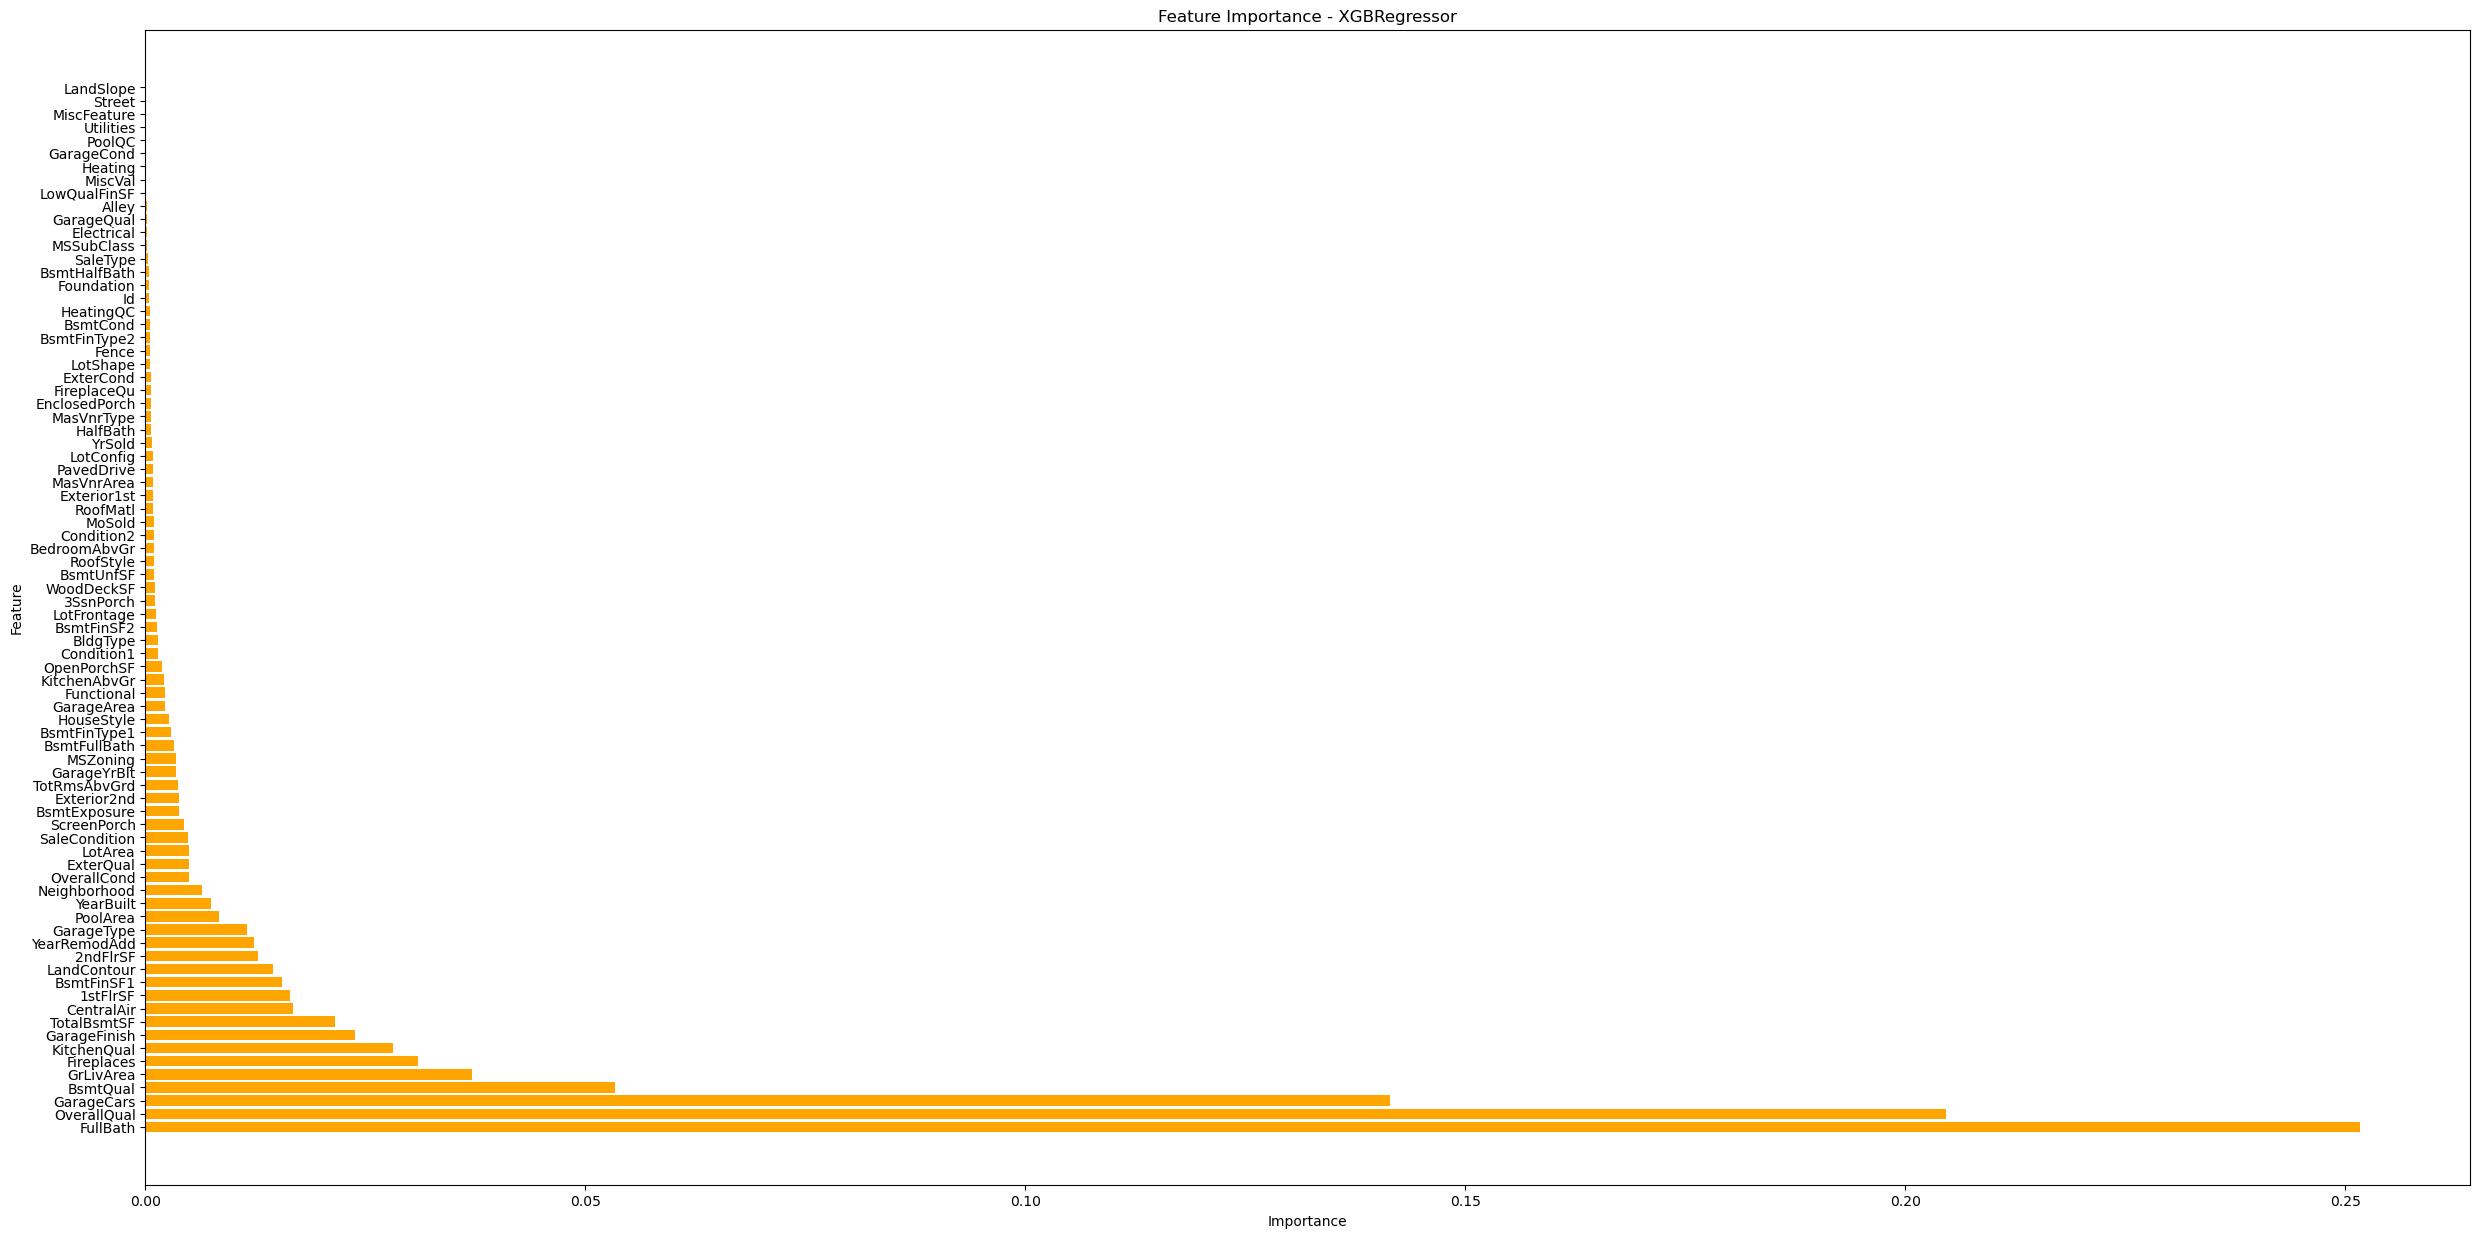

Top Features:
         Feature  Importance
49      FullBath    0.251618
17   OverallQual    0.204630
61    GarageCars    0.141421
30      BsmtQual    0.053372
46     GrLivArea    0.037139
56    Fireplaces    0.030955
53   KitchenQual    0.028101
60  GarageFinish    0.023828
38   TotalBsmtSF    0.021521
41    CentralAir    0.016739

Low Importance Features:
         Feature  Importance
6          Alley    0.000159
45  LowQualFinSF    0.000084
75       MiscVal    0.000061
39       Heating    0.000000
64    GarageCond    0.000000
72        PoolQC    0.000000
9      Utilities    0.000000
74   MiscFeature    0.000000
5         Street    0.000000
11     LandSlope    0.000000


In [102]:
# Feature importance from XGBRegressor
plt.figure(figsize=(30, 15))
xgb_importances = xgb_best.feature_importances_

# Create a DataFrame to hold feature names and their importance
feature_importance_df_xgb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_importances
})

# Sort the DataFrame by importance
feature_importance_df_xgb = feature_importance_df_xgb.sort_values(by='Importance', ascending=False)

# Plotting
plt.barh(feature_importance_df_xgb['Feature'], feature_importance_df_xgb['Importance'], color="orange")
plt.title("Feature Importance - XGBRegressor")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Identify top and low importance features
top_features_xgb = feature_importance_df_xgb.head(10)  # Top 10 features
low_importance_features_xgb = feature_importance_df_xgb.tail(10)  # Bottom 10 features

# Print top and low importance features
print("Top Features:")
print(top_features_xgb)

print("\nLow Importance Features:")
print(low_importance_features_xgb)

### **Conclusion for Feature Importance Analysis - XGBRegressor**

The feature importance analysis conducted using the XGBRegressor model reveals the following insights:

- **Top Features**: The most influential features in predicting house prices include:
  - [List the top features from `top_features_xgb` DataFrame here]

- **Low Importance Features**: The features with the least impact on the model's predictions are:
  - [List the low importance features from `low_importance_features_xgb` DataFrame here]

This analysis enhances our understanding of the factors driving house prices and can guide future modeling efforts by focusing on the most relevant features.

# Final Model

#### By comparing the R2 scores of all the algorithms  and its hyper tuned best parameters  the  **XGBoost Regressor**  Performs well and it gives better R2 score compared to all the other algorithms 

# Final Model Building and Training

In [107]:
# Get the best parameters and best score 
best_params = xgb_search.best_params_ 

print("Best Parameters:", best_params)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 1.0}


In [108]:
# Train the final model with the best parameters 
final_model = XGBRegressor(**best_params, random_state=42) 
final_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [109]:
# Make predictions 
final_pred = final_model.predict(X_test) 
print("Final Predictions:", final_pred)

Final Predictions: [143006.88  350140.94  112766.07  163382.64  321795.47   73444.88
 230495.97  142085.64   79934.7   129946.39  158709.53  125134.555
 108430.055 196849.62  173502.03  133883.89  192170.84  134924.64
 111926.586 213908.5   146191.3   218060.56  170169.05  129423.97
 198772.66  162237.58  193757.4    94433.15  174800.98  216641.55
 132855.28  248950.34  170239.88  114923.945 246741.31  149808.48
 137328.2   205966.67  319776.4   104892.34  131359.06  252893.69
 119350.04  395193.25  124643.05  133115.1   117514.28  127443.805
 438373.94  130229.49  125123.    205398.66  111231.3   328160.2
 142023.84  245878.94  186753.44  160493.11  131219.28   97940.875
  55682.11  165702.38  301702.56  293939.6   272449.03  223407.12
 107944.49  329789.4   112237.    163850.33  122393.4   127296.61
 110324.54   82725.8   484796.    191448.4   326351.28  312047.38
 144900.58  120136.27  100785.92   68521.06  108604.94   89044.07
 146193.52  137622.6   267348.1   194640.97  141563.61 

# Model Evaluation

In [111]:
# Evaluate the model 
evaluate_model("XGBRegressor (Tuned)", y_test, final_pred)

XGBRegressor (Tuned) Performance:
  MSE: 687601004.22
  RMSE: 26222.15
  R²: 0.91



In [112]:
# Calculate R-squared (R²) 
r2 = r2_score(y_test, final_pred) 
print(f"R-squared (R²): {r2:.4f}")

R-squared (R²): 0.9104


In [113]:
## Adjusted r2 - score

adjusted_r2= 1-(1-0.9104)*(292-1)/(292-80-1)

adjusted_r2

# 1- (1-r2score) * ((no. of . rows in x_test-1)/(no.of.rows in x_test - no.of.columns in x_test -1) )

0.8764284360189574

In [114]:
print(f"R2 Score (R²): {r2:.4f}")
print(f"Adjusted R2 score: {adjusted_r2:.4f}")

R2 Score (R²): 0.9104
Adjusted R2 score: 0.8764


## **Conclusion**  

This project focused on predicting house prices using advanced regression techniques. We analyzed various features, like property size, location, and neighborhood characteristics, to create models that estimate house prices accurately.  

Among all the models tested, the **XGBoost Regressor** performed the best. It achieved an **R² score of 0.9104**, meaning it explained over 91% of the variations in house prices, and an **adjusted R² score of 0.8764**, showing that it remained effective even with many features in the dataset.  

XGBoost stood out because it handled complex patterns in the data better than other models. It worked well with missing values, outliers, and interactions between features, making it an excellent choice for this task.  

The results also provided valuable insights into which factors influence house prices the most. Features like location, property size, and neighborhood qualities were found to have the biggest impact. These insights can help buyers, sellers, and real estate agents make smarter decisions about pricing and investments.  

In summary, the **XGBoost Regressor** proved to be the most reliable model for predicting house prices in this project. It not only provides accurate predictions but also helps better understand the key drivers behind house pricing trends.  
